<a href="https://colab.research.google.com/github/nadiradsrn/F-Study-Case-02/blob/main/Study_Case_02_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inputasi dan Preprocessing data

In [1]:
!pip install umap-learn
import umap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.1 MB/s eta 0:00:00


In [2]:
# URL raw dari file CSV
url = 'https://raw.githubusercontent.com/nadiradsrn/F-Study-Case-02/b3f6e86cd2a13498159fe2e5b9ffdae5e3484d9b/Case-Study-02-MixITup%20-%20Data.csv'

# Membaca data dari file CSV
df = pd.read_csv(url)

# Menampilkan beberapa baris pertama dari DataFrame
df.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,Rp13.114.754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,Rp33.606.557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,Rp15.983.606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,Rp12.704.918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,Rp20.081.967,42,1,Jakarta,2.0,Senin,8


In [3]:
print(f'shape: {df.shape}\nkolom: {df.columns}')

shape: (200, 10)
kolom: Index(['ID', 'Jenis Kelamin', 'Umur', 'Pendapatan-per-bulan',
       'skor-pengeluaran', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor'],
      dtype='object')


In [4]:
df.drop('ID', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         196 non-null    object 
 1   Umur                  200 non-null    object 
 2   Pendapatan-per-bulan  200 non-null    object 
 3   skor-pengeluaran      200 non-null    int64  
 4   Menikah               188 non-null    object 
 5   Kota                  200 non-null    object 
 6   Promo                 194 non-null    float64
 7   HariFav               200 non-null    object 
 8   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 14.2+ KB


In [6]:
for kolom in df.columns:
    print(f'kolom: {kolom}\ntotal unique: {df[kolom].nunique()}\nunique: {df[kolom].unique()}\n')

kolom: Jenis Kelamin
total unique: 3
unique: ['Wanita' 'Pria' nan '-']

kolom: Umur
total unique: 45
unique: ['49' '32' '51' '19' '38' '33' '27' '24' '21' '31' '36' '46' '60' '58'
 '47' '45' '22' '18' '59' '44' '39' '35' '20' '30' '23' '48' '37' '40'
 '34' '41' '53' '54' '28' '55' '25' '50' '42' '29' '43' '52' '2' "35'"
 '56' '26' '57']

kolom: Pendapatan-per-bulan
total unique: 64
unique: ['Rp13.114.754' 'Rp33.606.557' 'Rp15.983.606' 'Rp12.704.918'
 'Rp20.081.967' 'Rp29.098.360' 'Rp21.311.475' 'Rp2.049.180' 'Rp13.524.590'
 'Rp19.262.295' 'Rp11.475.409' 'Rp29.508.196' 'Rp34.016.393' 'Rp6.147.540'
 'Rp11.885.245' 'Rp25.819.672' 'Rp25.000.000' 'Rp5.327.868' 'Rp9.836.065'
 'Rp23.770.491' 'Rp22.950.819' 'Rp1.229.508' 'Rp9.016.393' 'Rp9.426.229'
 'Rp29.918.032' 'Rp28.688.524' 'Rp27.049.180' 'Rp18.442.622'
 'Rp19.672.131' 'Rp11.065.573' 'Rp36.065.573' 'Rp20.491.803'
 'Rp17.622.950' 'Rp409.836' 'Rp25.409.836' 'Rp1.639.344' 'Rp5.737.704'
 'Rp34.426.229' 'Rp10.245.901' 'Rp50.000.000' 'Rp14.344.

In [7]:
df.loc[df['Umur'] == "35'", 'Umur'] = 35
df = df[df['Umur'] != '2']
df.loc[df['Kota'] == "JJakarta", 'Kota'] = "Jakarta"
df.loc[df['Menikah'] == '-', 'Menikah'] = np.nan

In [8]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
df['Umur'] = df['Umur'].astype(int)
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace('Rp', '', regex=False)
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace('.', '', regex=False)
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].astype(int)

<ipython-input-8-c228bf76ba5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
<ipython-input-8-c228bf76ba5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Umur'] = df['Umur'].astype(int)
<ipython-input-8-c228bf76ba5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [9]:
a = df[['Jenis Kelamin', 'Umur', 'Menikah']]
rerata_cwo = a[a['Jenis Kelamin'] == 'Pria']["Umur"].sum() // a[a['Jenis Kelamin'] == 'Pria']["Umur"].count()
rerata_cwe = a[a['Jenis Kelamin'] == 'Wanita']["Umur"].sum() // a[a['Jenis Kelamin'] == 'Wanita']["Umur"].count()
rerata_pendapatan = df['Pendapatan-per-bulan'].sum() // df['Pendapatan-per-bulan'].count()

print(rerata_cwo, rerata_cwe, rerata_pendapatan)

38 36 18675343


In [10]:
df.loc[(df['Menikah'].isna()) & (df['Jenis Kelamin'] == 'Pria') & (df['Umur'] >= rerata_cwo), 'Menikah'] = '1'
df.loc[(df['Menikah'].isna()) & (df['Jenis Kelamin'] == 'Pria') & (df['Umur'] < rerata_cwo), 'Menikah'] = '0'
df.loc[(df['Menikah'].isna()) & (df['Jenis Kelamin'] == 'Wanita') & (df['Umur'] >= rerata_cwe), 'Menikah'] = '1'
df.loc[(df['Menikah'].isna()) & (df['Jenis Kelamin'] == 'Wanita') & (df['Umur'] < rerata_cwe), 'Menikah'] = '0'
df.loc[df['Menikah'] == ' ', 'Menikah'] = '0'
df.loc[df['Promo'] > 3, 'Promo'] = 3
df.loc[df['Pendapatan-per-bulan'] == 0, 'Pendapatan-per-bulan'] = rerata_pendapatan

In [11]:
for kolom in df.columns:
    print(f'kolom: {kolom}\ntotal unique: {df[kolom].nunique()}\nunique: {df[kolom].unique()}\n')

kolom: Jenis Kelamin
total unique: 3
unique: ['Wanita', 'Pria', NaN, '-']
Categories (3, object): ['-', 'Pria', 'Wanita']

kolom: Umur
total unique: 43
unique: [49 32 51 19 38 33 27 24 21 31 36 46 60 58 47 45 22 18 59 44 39 35 20 30
 23 48 37 40 34 41 53 54 28 55 25 50 42 29 43 52 56 26 57]

kolom: Pendapatan-per-bulan
total unique: 64
unique: [13114754 33606557 15983606 12704918 20081967 29098360 21311475  2049180
 13524590 19262295 11475409 29508196 34016393  6147540 11885245 25819672
 25000000  5327868  9836065 23770491 22950819  1229508  9016393  9426229
 29918032 28688524 27049180 18442622 19672131 11065573 36065573 20491803
 17622950   409836 25409836  1639344  5737704 34426229 10245901 50000000
 14344262 35245901  7377049 45491803 40163934 17213114 23360655  7786885
 18852459 22131147  3688524  2459016  3278688 24180327 22540983   819672
 13934426 26229508 31967213 24590163 18032786 43032786 18675343  4098360]

kolom: skor-pengeluaran
total unique: 85
unique: [ 52  86  41  55  4

In [12]:
df = df[df['FavFlavor'] <= 8]
df.drop(df[df["Jenis Kelamin"] == '-'].index, inplace=True)
df.dropna(inplace=True)

In [13]:
for kolom in df.columns:
    print(f'kolom: {kolom}\ntotal unique: {df[kolom].nunique()}\nunique: {df[kolom].unique()}\n')

kolom: Jenis Kelamin
total unique: 2
unique: ['Wanita', 'Pria']
Categories (3, object): ['-', 'Pria', 'Wanita']

kolom: Umur
total unique: 43
unique: [49 32 51 19 38 33 27 24 21 36 46 60 58 47 45 22 18 59 44 39 35 20 30 23
 48 37 40 34 41 53 54 28 55 31 25 50 42 29 43 52 56 26 57]

kolom: Pendapatan-per-bulan
total unique: 64
unique: [13114754 33606557 15983606 12704918 20081967 29098360 21311475  2049180
 13524590 19262295 29508196 34016393  6147540 11885245 25819672 25000000
  5327868 11475409 23770491 22950819  1229508  9016393  9426229 29918032
 28688524 27049180 18442622 19672131 11065573 36065573 20491803 17622950
   409836 25409836  1639344  5737704 34426229  9836065 10245901 50000000
 14344262 35245901  7377049 45491803 40163934 17213114 23360655  7786885
 18852459 22131147  3688524  2459016  3278688 24180327 22540983 13934426
 26229508 31967213 24590163 18032786 43032786  4098360 18675343   819672]

kolom: skor-pengeluaran
total unique: 85
unique: [ 52  86  41  55  42  95  56 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         187 non-null    category
 1   Umur                  187 non-null    int64   
 2   Pendapatan-per-bulan  187 non-null    int64   
 3   skor-pengeluaran      187 non-null    int64   
 4   Menikah               187 non-null    object  
 5   Kota                  187 non-null    object  
 6   Promo                 187 non-null    float64 
 7   HariFav               187 non-null    object  
 8   FavFlavor             187 non-null    int64   
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 13.5+ KB


In [15]:
df.describe(include='all')

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
count,187,187.000000,1.870000e+02,187.000000,187,187,187.000000,187,187.000000
unique,2,NaN,NaN,NaN,2,3,NaN,7,NaN
top,Wanita,NaN,NaN,NaN,1,Jakarta,NaN,Senin,NaN
freq,103,NaN,NaN,NaN,159,81,NaN,64,NaN
mean,NaN,37.631016,1.891945e+07,50.502674,NaN,NaN,1.652406,NaN,3.577540
std,NaN,11.905890,1.067615e+07,26.167035,NaN,NaN,0.945864,NaN,2.731365
min,NaN,18.000000,4.098360e+05,1.000000,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,28.000000,1.147541e+07,34.500000,NaN,NaN,1.000000,NaN,1.000000
50%,NaN,36.000000,1.926230e+07,50.000000,NaN,NaN,1.000000,NaN,3.000000
75%,NaN,48.000000,2.581967e+07,73.000000,NaN,NaN,3.000000,NaN,6.000000


In [16]:
df['Menikah'] = df['Menikah'].astype(int)
df['Kota'] = df['Kota'].astype('category')
df['Promo'] = df['Promo'].astype(int)
df['HariFav'] = df['HariFav'].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         187 non-null    category
 1   Umur                  187 non-null    int64   
 2   Pendapatan-per-bulan  187 non-null    int64   
 3   skor-pengeluaran      187 non-null    int64   
 4   Menikah               187 non-null    int64   
 5   Kota                  187 non-null    category
 6   Promo                 187 non-null    int64   
 7   HariFav               187 non-null    category
 8   FavFlavor             187 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 11.4 KB


In [18]:
df.describe(include='all')

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
count,187,187.000000,1.870000e+02,187.000000,187.000000,187,187.000000,187,187.000000
unique,2,NaN,NaN,NaN,NaN,3,NaN,7,NaN
top,Wanita,NaN,NaN,NaN,NaN,Jakarta,NaN,Senin,NaN
freq,103,NaN,NaN,NaN,NaN,81,NaN,64,NaN
mean,NaN,37.631016,1.891945e+07,50.502674,0.850267,NaN,1.652406,NaN,3.577540
std,NaN,11.905890,1.067615e+07,26.167035,0.357767,NaN,0.945864,NaN,2.731365
min,NaN,18.000000,4.098360e+05,1.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,NaN,28.000000,1.147541e+07,34.500000,1.000000,NaN,1.000000,NaN,1.000000
50%,NaN,36.000000,1.926230e+07,50.000000,1.000000,NaN,1.000000,NaN,3.000000
75%,NaN,48.000000,2.581967e+07,73.000000,1.000000,NaN,3.000000,NaN,6.000000


In [19]:
df.sample(6)

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
191,Wanita,22,819672,76,1,Depok,1,Senin,0
108,Wanita,32,18442622,42,1,Jakarta,2,Senin,7
143,Pria,42,29098360,20,1,Tangerang,3,Minggu,7
169,Pria,32,45491803,74,1,Depok,1,Minggu,3
74,Wanita,24,9836065,65,1,Depok,1,Selasa,6
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2


# Melakukan persiapan untuk model

In [20]:
def encode_kota(x):
    if x == "Jakarta":
        return 0
    if x == "Tangerang":
        return 1
    if x == "Depok":
        return 2

def encode_HariFav(x):
    hari = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
    return hari.index(x)

def encode_JK(x):
    if x == 'Pria':
        return 0
    if x == 'Wanita':
        return 1

In [21]:
df_encode = df[['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran', 'Menikah', 'Promo', 'FavFlavor']]
df_encode['kota encode'] = df['Kota'].apply(encode_kota)
df_encode['HariFav encode'] = df['HariFav'].apply(encode_HariFav)
df_encode['Kelamin encode'] = df['Jenis Kelamin'].apply(encode_JK)

<ipython-input-21-860bebe1a7b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encode['kota encode'] = df['Kota'].apply(encode_kota)
<ipython-input-21-860bebe1a7b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encode['HariFav encode'] = df['HariFav'].apply(encode_HariFav)


In [22]:
df_encode.head()

,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Promo,FavFlavor,kota encode,HariFav encode,Kelamin encode
0,49,13114754,52,1,1,2,0,6,1.0
1,32,33606557,86,1,1,6,2,0,1.0
2,51,15983606,41,1,2,3,0,0,0.0
3,19,12704918,55,0,1,7,0,3,0.0
4,38,20081967,42,1,2,8,0,1,1.0


In [23]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Umur                  187 non-null    int64   
 1   Pendapatan-per-bulan  187 non-null    int64   
 2   skor-pengeluaran      187 non-null    int64   
 3   Menikah               187 non-null    int64   
 4   Promo                 187 non-null    int64   
 5   FavFlavor             187 non-null    int64   
 6   kota encode           187 non-null    category
 7   HariFav encode        187 non-null    category
 8   Kelamin encode        187 non-null    float64 
dtypes: category(2), float64(1), int64(6)
memory usage: 12.5 KB


In [24]:
!pip install kmodes
!pip install gower
import warnings; warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import gower
import umap
import pickle

sns.set(style="ticks", color_codes=True)
random_state = 12

In [25]:
df_biasa = df
df_encode = df_encode

In [26]:
df_biasa.sample(5)

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
157,Wanita,38,25819672,76,1,Depok,1,Sabtu,1
57,Wanita,40,5737704,31,1,Tangerang,3,Selasa,1
167,Pria,32,29508196,63,1,Jakarta,1,Sabtu,5
69,Pria,28,35245901,68,1,Depok,1,Senin,8
138,Pria,20,18852459,49,0,Jakarta,2,Senin,5


In [27]:
df_encode = df_encode.rename(columns={"Pendapatan-per-bulan": "PPB"})
df_encode['Kelamin encode'] = df_encode["Kelamin encode"].astype(int)
df_encode = df_encode[['Umur', 'PPB', 'skor-pengeluaran', 'Kelamin encode', 'Menikah', 'Promo', 'FavFlavor', 'kota encode', 'HariFav encode']]

In [28]:
df_encode.sample(4)

,Umur,PPB,skor-pengeluaran,Kelamin encode,Menikah,Promo,FavFlavor,kota encode,HariFav encode
18,45,5327868,32,1,1,3,3,1,6
79,35,5327868,61,0,1,1,4,0,2
72,48,15983606,46,0,1,2,0,0,0
59,48,9836065,36,0,1,2,1,0,6


In [29]:
numerik = ['Umur', 'PPB', 'skor-pengeluaran']
kategorik = ['Kelamin encode', 'Menikah', 'Promo', 'FavFlavor', 'kota encode', 'HariFav encode']


In [30]:
df_encode.describe(include='all')

,Umur,PPB,skor-pengeluaran,Kelamin encode,Menikah,Promo,FavFlavor,kota encode,HariFav encode
count,187.000000,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.0,187.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,64.0
mean,37.631016,1.891945e+07,50.502674,0.550802,0.850267,1.652406,3.577540,NaN,NaN
std,11.905890,1.067615e+07,26.167035,0.498748,0.357767,0.945864,2.731365,NaN,NaN
min,18.000000,4.098360e+05,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,28.000000,1.147541e+07,34.500000,0.000000,1.000000,1.000000,1.000000,NaN,NaN
50%,36.000000,1.926230e+07,50.000000,1.000000,1.000000,1.000000,3.000000,NaN,NaN
75%,48.000000,2.581967e+07,73.000000,1.000000,1.000000,3.000000,6.000000,NaN,NaN


In [31]:
for kolom in kategorik:
    a = df_encode[kolom].unique()
    print(f'kolom: {kolom}\nuniq: {sorted(a)}')
    for unik in sorted(a):
        print(f'{unik}: {df_encode[df_encode[kolom] == unik][kolom].count()}')
    print('\n')

kolom: Kelamin encode
uniq: [0, 1]
0: 84
1: 103


kolom: Menikah
uniq: [0, 1]
0: 28
1: 159


kolom: Promo
uniq: [0, 1, 2, 3]
0: 14
1: 85
2: 40
3: 48


kolom: FavFlavor
uniq: [0, 1, 2, 3, 4, 5, 6, 7, 8]
0: 37
1: 20
2: 18
3: 19
4: 20
5: 19
6: 16
7: 19
8: 19


kolom: kota encode
uniq: [0, 1, 2]
0: 81
1: 50
2: 56


kolom: HariFav encode
uniq: [0, 1, 2, 3, 4, 5, 6]
0: 37
1: 64
2: 21
3: 5
4: 6
5: 3
6: 51




In [32]:
#df_model = StandardScaler().fit_transform(df_encode[numerik])
df_model = pd.DataFrame(data=StandardScaler().fit_transform(df_encode[numerik]), index=df_encode.index, columns=numerik)

In [33]:
df_model.head()

,Umur,PPB,skor-pengeluaran
0,0.957468,-0.545167,0.057375
1,-0.474230,1.379386,1.360208
2,1.125903,-0.275729,-0.364129
3,-1.569058,-0.583658,0.172331
4,0.031075,0.109181,-0.325811


In [34]:
for kolom in kategorik:
    df_model[kolom] = df_encode[kolom]

In [35]:
df_model.sample(7)

,Umur,PPB,skor-pengeluaran,Kelamin encode,Menikah,Promo,FavFlavor,kota encode,HariFav encode
32,-0.137360,0.917493,0.938704,1,1,1,6,2,0
14,1.715425,-1.584425,-1.360413,1,1,3,8,1,6
41,-0.390013,-0.737622,0.363924,0,1,1,0,0,1
89,-0.811100,0.609565,1.781713,0,1,0,0,2,1
99,-0.726883,-0.814604,-0.325811,1,1,2,5,0,5
104,1.378555,-1.276497,-1.398732,1,1,3,4,1,6
58,0.283727,1.456368,-0.440767,1,1,2,4,0,0


In [36]:
df_modelNum = df_model.drop(['FavFlavor', 'kota encode', 'HariFav encode'], axis=1)

In [37]:
df_model.describe(include='all').round(0)

,Umur,PPB,skor-pengeluaran,Kelamin encode,Menikah,Promo,FavFlavor,kota encode,HariFav encode
count,187.0,187.0,187.0,187.0,187.0,187.0,187.0,187.0,187.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,64.0
mean,-0.0,-0.0,0.0,1.0,1.0,2.0,4.0,NaN,NaN
std,1.0,1.0,1.0,0.0,0.0,1.0,3.0,NaN,NaN
min,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,NaN,NaN
25%,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,NaN,NaN
50%,-0.0,0.0,-0.0,1.0,1.0,1.0,3.0,NaN,NaN
75%,1.0,1.0,1.0,1.0,1.0,3.0,6.0,NaN,NaN


In [38]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Umur              187 non-null    float64 
 1   PPB               187 non-null    float64 
 2   skor-pengeluaran  187 non-null    float64 
 3   Kelamin encode    187 non-null    int64   
 4   Menikah           187 non-null    int64   
 5   Promo             187 non-null    int64   
 6   FavFlavor         187 non-null    int64   
 7   kota encode       187 non-null    category
 8   HariFav encode    187 non-null    category
dtypes: category(2), float64(3), int64(4)
memory usage: 12.5 KB


Dari sini kita memiliki 3 buah dataframe  yakni


*   df_biasa: yaitu dataframe awal yang telah dilakukan preprocess
*   df_model: dataframe yang sudah distandarisasi dan dilakukan encode pada kolom kategorik untuk algoritma yang bisa menangani tipe data campuran
* df_modelNum: dataframe ini berisi kolom numerik saja dan kategorik yang hanya berisi binary dan numeric ordinal yang nantinya akan digunakan untuk algoritma yang tidak bisa menangani tipe data campuran



# Visualisasi Data PreProsessing

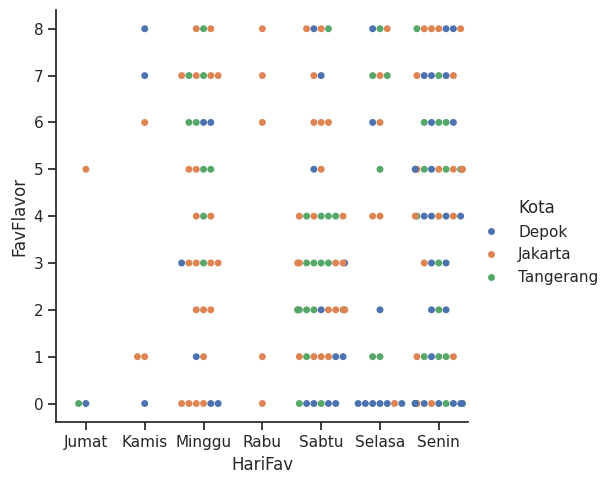

In [39]:
p= sns.catplot(x="HariFav", y="FavFlavor", hue="Kota", kind="swarm", data=df_biasa)

Dari Visualisasi diatas dapat kita ketahui bahwa Jakarta adalah kota yang peminatnya paling tinggi dibandingkan Depok dan Tangerang. Hari Senin merupakan hari yang paling banyak didatangi pelanggan dengan kartu loyality, pada hari Rabu, Kamis dan Jumat cenderung tidak didatangi pelanggan dengan kartu loyality. Rasa yang paling banyak dipesan oleh pelanggan adalah rasa vanila. Kota Jakarta dan kota Tanggerang memesan rasa yang beragam, namun untuk Kota Depok pelanggan cenderung memesan rasa vanila.

Rekomendasi :
1. Mengingat bahwa pada hari Selasa, Rabu, Kamis, dan Jumat cenderung sepi pengunjung dengan kartu loyalitas, pertimbangkan untuk membuat promosi khusus atau penawaran spesial pada hari-hari tersebut, seperti bonus poin untuk setiap pembelian, diskon khusus, atau bundling produk untuk menarik lebih banyak pelanggan.
2. Mendorong pelanggan di Depok untuk mencoba rasa lain dengan menawarkan promo diskon bagi pembelian rasa baru selain vanila.
3. Di Jakarta dan Tangerang, berikan promosi dari dua rasa yang berbeda(misalnya, beli dua rasa berbeda dapat potongan harga).


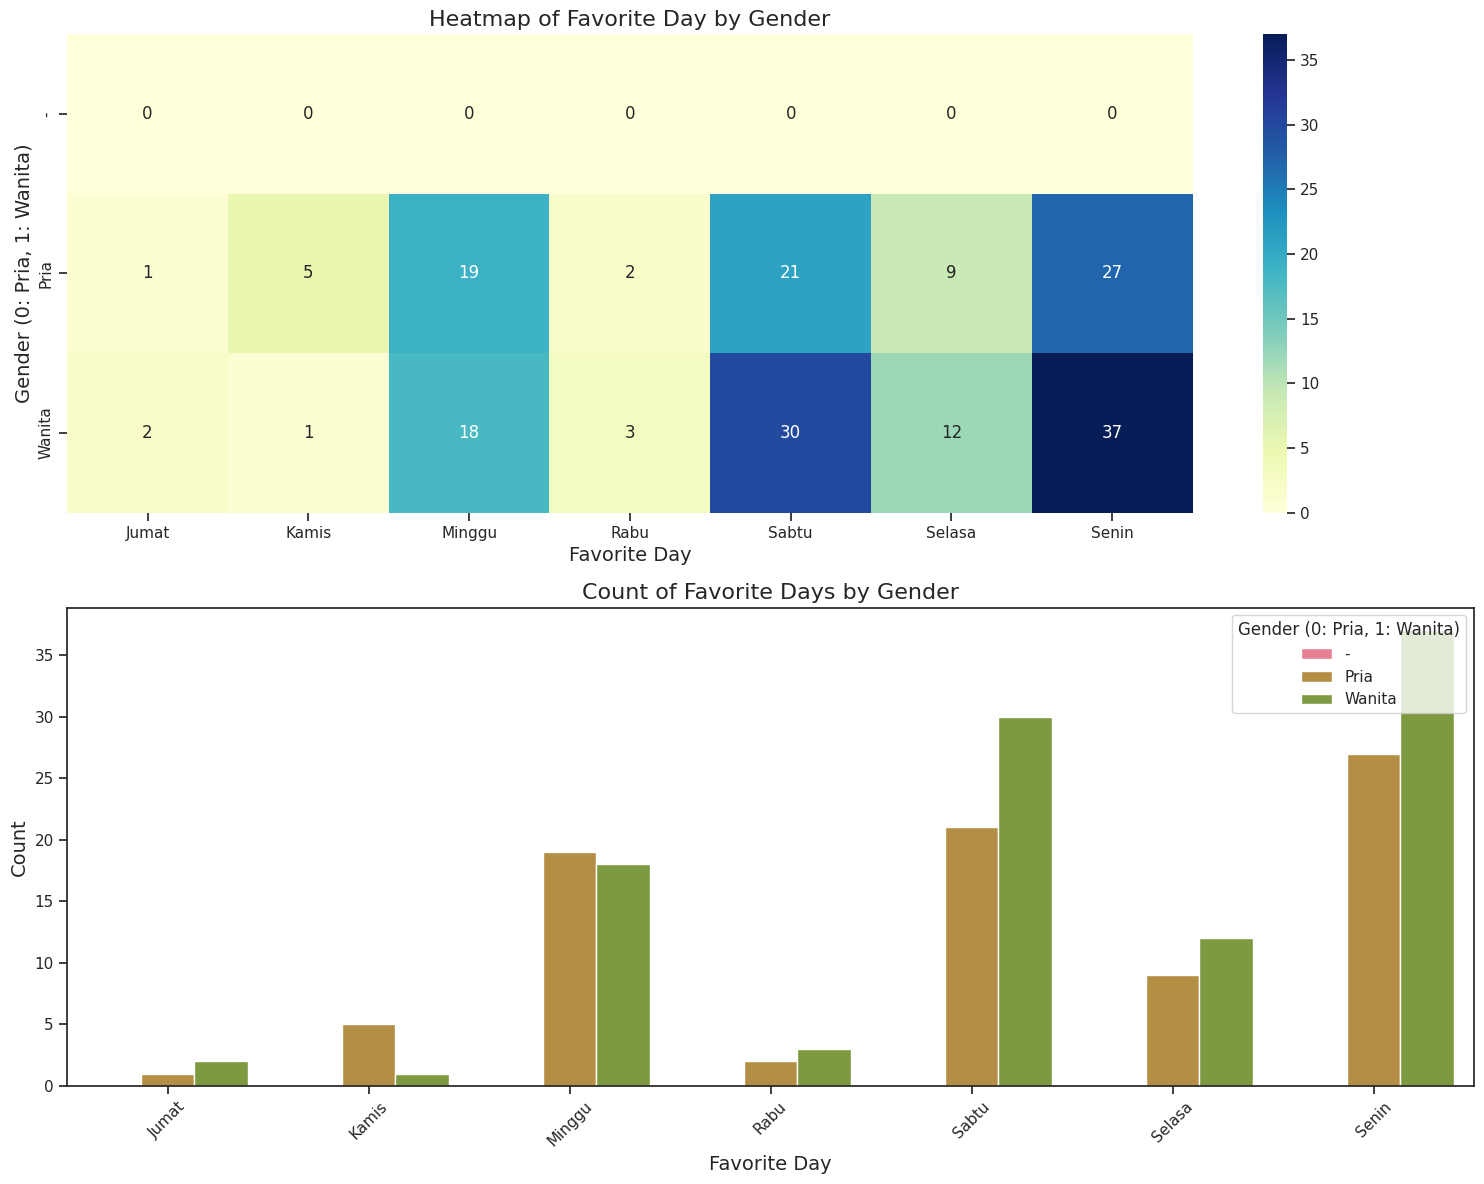

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
palette = sns.color_palette("husl", len(df_biasa['HariFav'].unique()))  # Use unique colors for each favorite day

# Create a figure for the heatmap and count plot
plt.figure(figsize=(15, 12))

# Part 1: Heatmap of Favorite Day by Gender
plt.subplot(2, 1, 1)  # Create a subplot for the heatmap
day_gender_comparison = df_biasa.groupby('Jenis Kelamin')['HariFav'].value_counts().unstack().fillna(0)

# Visualizing the relationship using a heatmap
sns.heatmap(day_gender_comparison, annot=True, cmap='YlGnBu', fmt='.0f')

plt.title('Heatmap of Favorite Day by Gender', fontsize=16)
plt.xlabel('Favorite Day', fontsize=14)
plt.ylabel('Gender (0: Pria, 1: Wanita)', fontsize=14)

# Part 2: Count Plot of Favorite Days by Gender
plt.subplot(2, 1, 2)  # Create a subplot for the count plot
sns.countplot(x='HariFav', hue='Jenis Kelamin', data=df_biasa, palette=palette)

# Customize the plot
plt.title('Count of Favorite Days by Gender', fontsize=16)
plt.xlabel('Favorite Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender (0: Pria, 1: Wanita)', loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Hubungan antara Jenis Kelamin dengan Hari Favorite**

Dari data yang tersedia, terlihat bahwa toko es krim mengalami lonjakan pengunjung pada hari Senin, Sabtu dan Minggu, namun mengalami penurunan yang cukup drastis pada hari-hari kerja lainnya (Selasa hingga Jumat). Agar toko tetap ramai di hari-hari tersebut, berikut beberapa strategi yang bisa diterapkan:

1. **Promosi Spesial di Hari Sepi**

  Mengadakan promosi khusus pada hari Selasa hingga Jumat bisa menarik lebih banyak pengunjung. Misalnya, menawarkan diskon “Beli Satu Gratis Satu” atau potongan harga 20-30% khusus di hari-hari ini. Ini memberikan dorongan ekstra bagi pelanggan untuk datang pada hari kerja.

2. **Cross-Selling dengan Produk Pelengkap**
  
  Tawarkan produk tambahan seperti topping, minuman, atau makanan ringan yang melengkapi es krim. Memberikan promosi bundling (misalnya, es krim dengan minuman atau snack) dapat menambah daya tarik dan meningkatkan penjualan.

3. **Hari Tematik atau Event Khusus**

  Mengadakan event mingguan seperti “Rabu Ceria” atau “Kamis Bahagia” dengan tema tertentu, bisa memberikan pengalaman yang berbeda bagi pelanggan. Contoh, Rabu dengan topping gratis atau Kamis dengan harga khusus untuk varian tertentu.

4. **Program Loyalitas atau Keanggotaan**
  Program loyalitas dengan keuntungan khusus bagi pelanggan setia, seperti point reward atau diskon member, dapat mendorong mereka untuk datang lebih sering. Program ini bisa memberikan penawaran spesial di hari-hari sepi sehingga pengunjung merasa ada keuntungan tambahan jika datang di luar hari Senin atau Minggu.

Dengan strategi-strategi ini, toko dapat meningkatkan traffic pengunjung pada hari-hari kerja, membuat kunjungan menjadi lebih menarik, dan pada akhirnya meningkatkan penjualan sepanjang minggu.

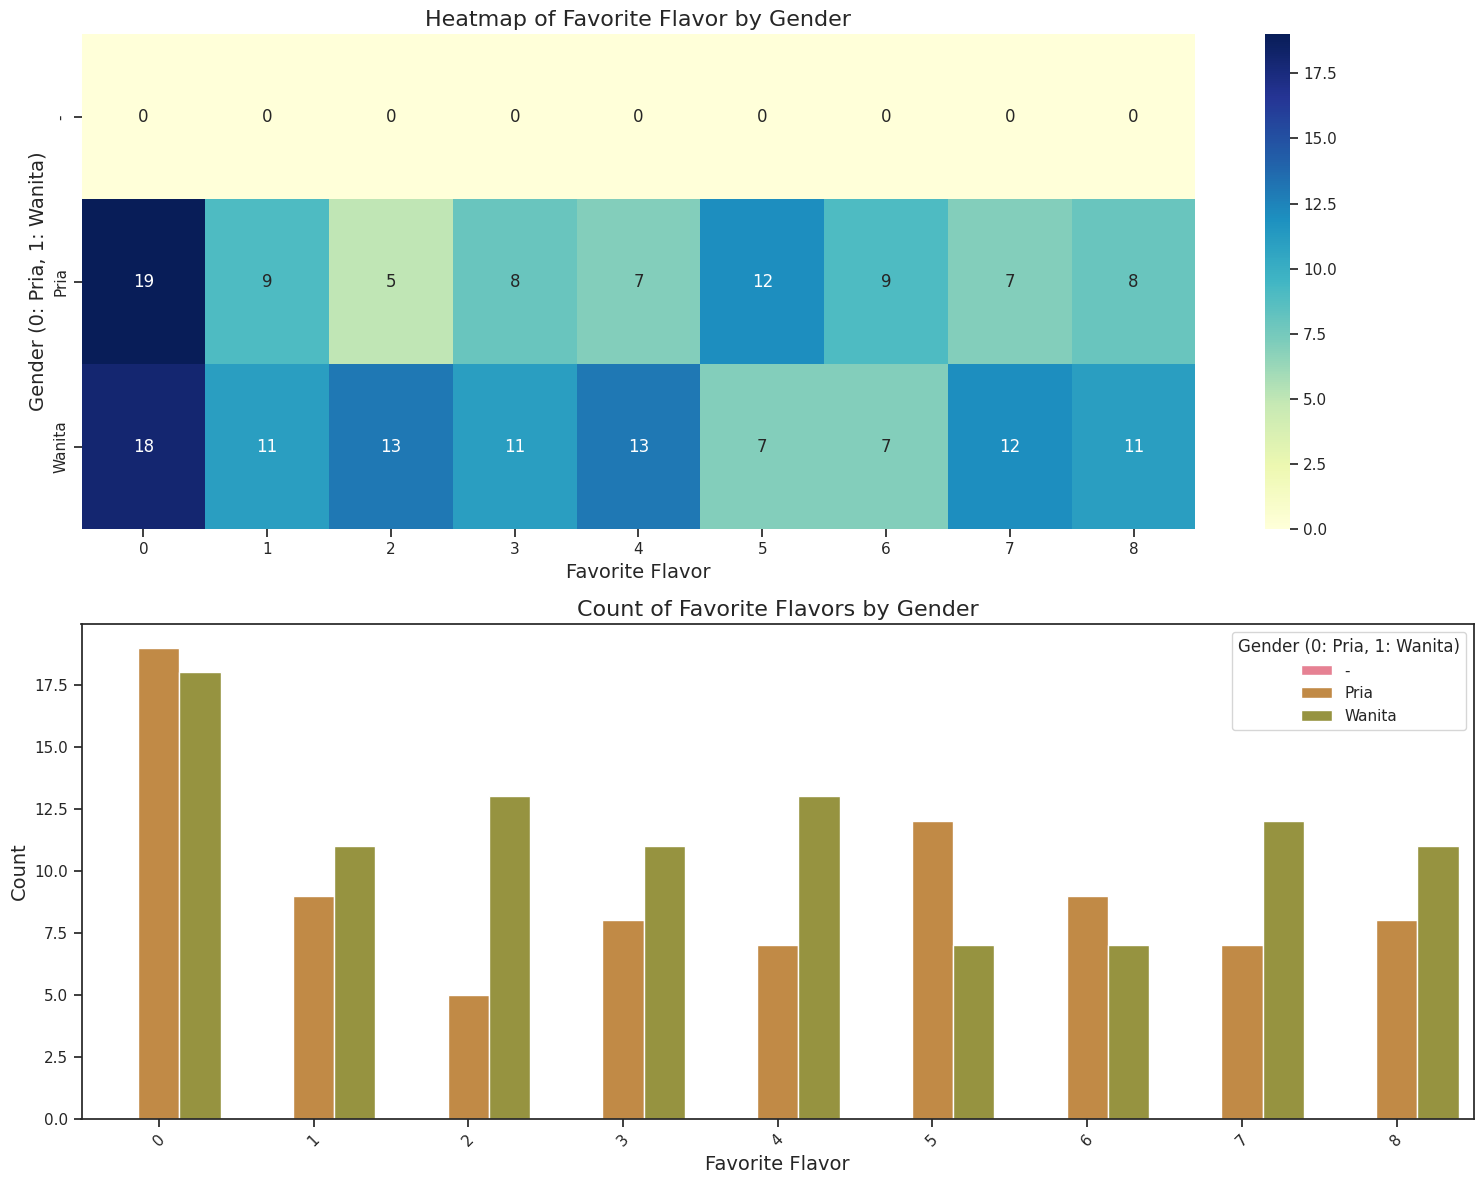

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
palette = sns.color_palette("husl", len(df_biasa['FavFlavor'].unique()))  # Use unique colors for each flavor

# Create a figure for the heatmap and count plot
plt.figure(figsize=(15, 12))

# Part 1: Heatmap of Favorite Flavor by Gender
plt.subplot(2, 1, 1)  # Create a subplot for the heatmap
flavor_gender_comparison = df_biasa.groupby('Jenis Kelamin')['FavFlavor'].value_counts().unstack().fillna(0)

# Visualizing the relationship using a heatmap
sns.heatmap(flavor_gender_comparison, annot=True, cmap='YlGnBu', fmt='.0f')

plt.title('Heatmap of Favorite Flavor by Gender', fontsize=16)
plt.xlabel('Favorite Flavor', fontsize=14)
plt.ylabel('Gender (0: Pria, 1: Wanita)', fontsize=14)

# Part 2: Count Plot of Favorite Flavors by Gender
plt.subplot(2, 1, 2)  # Create a subplot for the count plot
sns.countplot(x='FavFlavor', hue='Jenis Kelamin', data=df, palette=palette)

# Customize the plot
plt.title('Count of Favorite Flavors by Gender', fontsize=16)
plt.xlabel('Favorite Flavor', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender (0: Pria, 1: Wanita)', loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Hubungan antara Jenis Kelamin dengan Rasa Favorite**

Berdasarkan pola preferensi rasa yang ada, peminat rasa dari kalangann pria maupun wanita tidak berbeda jauh. Ada beberapa strategi yang bisa dipertimbangkan untuk meningkatkan pendapatan toko:

1. **Fokus pada Rasa Vanilla:**

 Karena vanilla adalah rasa favorit baik untuk pria maupun wanita, Kita bisa meningkatkan stok atau memperkenalkan variasi vanilla, seperti vanilla bean, french vanilla, atau tambahan topping khusus. Penawaran khusus vanilla di hari-hari dengan pengunjung rendah bisa juga menarik lebih banyak orang.

2. **Tingkatkan Daya Tarik Rasa Coklat untuk Pria:**

  Mengingat coklat populer di kalangan wanita tetapi kurang menarik bagi pria, kita bisa mencoba strategi untuk membuat coklat lebih menarik bagi segmen pria. Misalnya, tawarkan rasa coklat dengan tambahan khusus seperti coklat dark atau varian dengan tambahan rasa kopi atau kacang.

3. **Paket atau Cross-selling:**

 Buat paket spesial yang menggabungkan rasa vanilla dan coklat, agar pengunjung terdorong untuk membeli lebih dari satu rasa. Anda bisa menyebutnya *"Combo Classic"* atau *"Duo Favorit"* untuk menargetkan pasangan atau teman yang mungkin datang bersama.

4. **Promosi untuk Eksplorasi Rasa:**
 Karena rata-rata penjualan rasa tidak jauh berbeda, coba promosi yang mengajak pengunjung mencoba rasa yang berbeda, seperti “Coba Semua Rasa” dengan diskon kecil jika mereka membeli rasa yang kurang diminati, misalnya coklat bagi pria.

5. **Perbanyak Sampling Gratis Rasa Coklat:**
  Menyediakan sampel gratis rasa coklat untuk pria atau bundling rasa coklat dengan pembelian rasa lain bisa menjadi cara efektif untuk meningkatkan minat.

Secara keseluruhan, strategi ini bertujuan meningkatkan pendapatan dengan merespons preferensi rasa yang ada, sekaligus mencoba menarik minat pada rasa yang kurang populer bagi beberapa pelanggan. Tetapi secara keseluruhan penjualan es krim dengan berbagai rasa ini memiliki penjualan yang baik karena semua rasa terjual dengan baik dan tidak ada rasa dengan peminat yang sangat sedikit, masing-masing memiliki peminatnya sendiri baik itu pria maupun wanita.

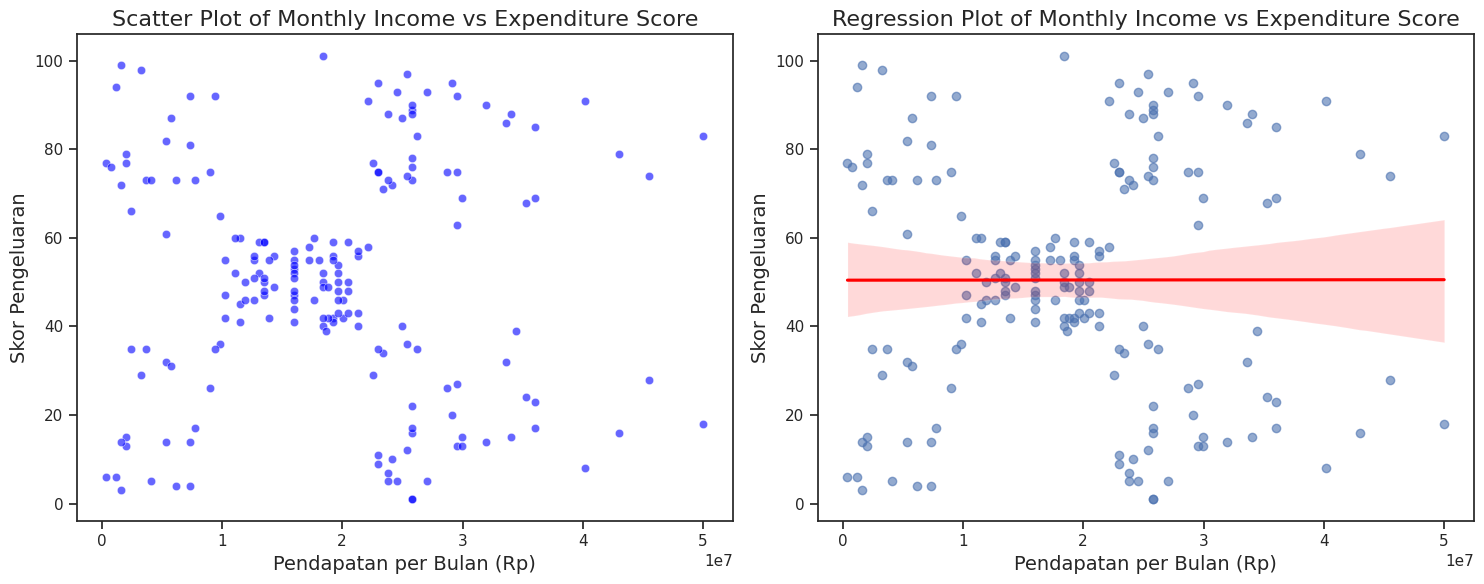

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure for the plots
plt.figure(figsize=(15, 6))

# Scatter plot to show the relationship between Monthly Income and Expenditure Score
plt.subplot(1, 2, 1)  # Create a subplot for the scatter plot
sns.scatterplot(x='Pendapatan-per-bulan', y='skor-pengeluaran', data=df_biasa, color='blue', alpha=0.6)

# Customize the scatter plot
plt.title('Scatter Plot of Monthly Income vs Expenditure Score', fontsize=16)
plt.xlabel('Pendapatan per Bulan (Rp)', fontsize=14)
plt.ylabel('Skor Pengeluaran', fontsize=14)

# Regression plot to show the trend
plt.subplot(1, 2, 2)  # Create a subplot for the regression plot
sns.regplot(x='Pendapatan-per-bulan', y='skor-pengeluaran', data=df_biasa, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})

# Customize the regression plot
plt.title('Regression Plot of Monthly Income vs Expenditure Score', fontsize=16)
plt.xlabel('Pendapatan per Bulan (Rp)', fontsize=14)
plt.ylabel('Skor Pengeluaran', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Hubungan antara Pendapatan-per-bulan dengan skor-pengeluaran**

Berdasarkan scatter plot dan regression plot, tidak tampak adanya pola korelasi yang jelas antara pendapatan dan skor pengeluaran; skor pengeluaran menyebar hampir merata di berbagai rentang pendapatan. Ini berarti pendapatan bulanan pelanggan tidak berpengaruh secara langsung terhadap skor pengeluaran mereka, setidaknya pada dataset ini.

Dari visualisasi ini, kita dapat menyimpulkan bahwa tingkat pengeluaran pelanggan tidak dipengaruhi langsung oleh pendapatan mereka. Hal ini berarti baik pelanggan dengan pendapatan rendah maupun tinggi memiliki kemungkinan untuk memiliki skor pengeluaran yang bervariasi.

Rekomendasi untuk Meningkatkan Pendapatan Toko Es Krim
Karena pendapatan tidak berpengaruh langsung terhadap skor pengeluaran, kita bisa mencoba pendekatan berikut:

1. **Segmentasi Berdasarkan Skor Pengeluaran:**

  Mengelompokkan pelanggan berdasarkan skor pengeluaran (misalnya, kelompok pengeluaran rendah, menengah, dan tinggi). Menawarkan promosi khusus atau paket bundling yang disesuaikan dengan tiap kelompok. Misalnya, untuk kelompok pengeluaran rendah, Anda bisa menawarkan diskon atau insentif untuk mendorong pembelian lebih banyak.

2. **Strategi Cross-Selling dan Upselling:**

  Tawarkan produk tambahan atau upgrade ketika pelanggan melakukan pembelian. Misalnya, tawarkan topping tambahan atau ukuran yang lebih besar dengan sedikit biaya tambahan. Pelanggan yang memiliki skor pengeluaran tinggi mungkin tertarik pada penawaran eksklusif, seperti es krim premium atau menu baru.

3. **Penargetan Hari Tertentu dengan Promosi:**

  Mengingat insight sebelumnya tentang hari-hari dengan kunjungan rendah, Toko bisa menawarkan diskon khusus atau acara spesial pada hari kerja (Selasa hingga Jumat) untuk meningkatkan kunjungan dan memperbesar skor pengeluaran pembeli.

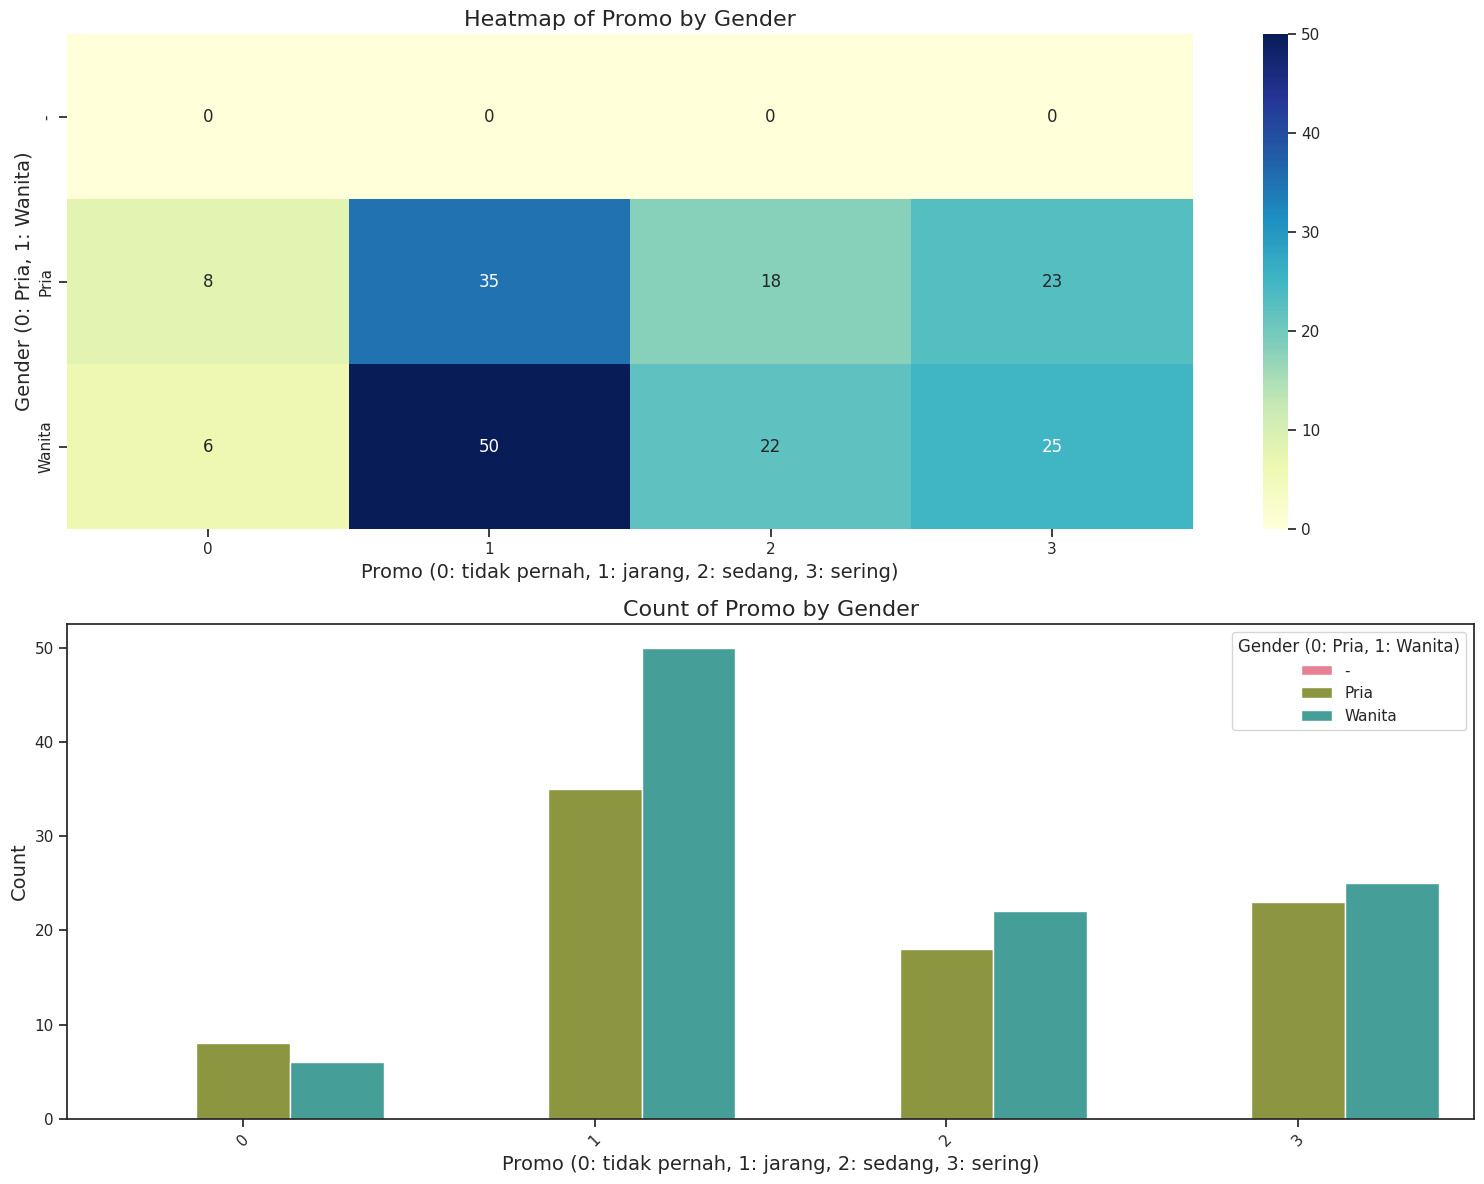

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette for the count plot
palette = sns.color_palette("husl", len(df['Promo'].unique()))  # Use unique colors for each promo type

# Create a figure for the heatmap and count plot
plt.figure(figsize=(15, 12))

# Part 1: Heatmap of Promo by Gender
plt.subplot(2, 1, 1)  # Create a subplot for the heatmap
promo_gender_comparison = df_biasa.groupby('Jenis Kelamin')['Promo'].value_counts().unstack().fillna(0)

# Visualizing the relationship using a heatmap
sns.heatmap(promo_gender_comparison, annot=True, cmap='YlGnBu', fmt='.0f')

plt.title('Heatmap of Promo by Gender', fontsize=16)
plt.xlabel('Promo (0: tidak pernah, 1: jarang, 2: sedang, 3: sering)', fontsize=14)
plt.ylabel('Gender (0: Pria, 1: Wanita)', fontsize=14)

# Part 2: Count Plot of Promo by Gender
plt.subplot(2, 1, 2)  # Create a subplot for the count plot
sns.countplot(x='Promo', hue='Jenis Kelamin', data=df_biasa, palette=palette)

# Customize the plot
plt.title('Count of Promo by Gender', fontsize=16)
plt.xlabel('Promo (0: tidak pernah, 1: jarang, 2: sedang, 3: sering)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender (0: Pria, 1: Wanita)', loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Hubungan antara Jenis Kelamin dengan Promo**

Dari hasil visualisasi yang Ada, terlihat bahwa:

1. **Sedikit sekali yang tidak menggunakan promo**: Promo berhasil menarik perhatian sebagian besar pelanggan, baik pria maupun wanita, yang mengindikasikan bahwa promo ini memberikan nilai atau daya tarik bagi pelanggan.
  
2. **Wanita dominan dalam kategori "jarang" menggunakan promo**: Meski menggunakan promo, wanita cenderung lebih jarang menggunakannya dibandingkan pria. Ini mungkin mengindikasikan bahwa mereka lebih selektif atau bahwa jenis promo yang diberikan belum optimal dalam memenuhi preferensi mereka.

3. **Kecenderungan hampir sama pada kategori "sedang" dan "sering"**: Hal ini mengindikasikan bahwa promo yang sering digunakan juga diminati oleh berbagai kelompok, tanpa perbedaan yang signifikan antara pria dan wanita.

### Insight dan Rekomendasi

Berdasarkan analisis tersebut, berikut adalah beberapa saran yang bisa membantu meningkatkan pendapatan:

1. **Perkuat Promo untuk Segmen yang Jarang Menggunakan**:
   - Karena wanita cenderung "jarang" menggunakan promo, pertimbangkan untuk menawarkan promo yang lebih relevan bagi mereka. Misalnya, promo spesial untuk pembelian rasa tertentu atau paket bundling yang lebih menarik bagi pelanggan wanita.
   - **Contoh Promo Khusus**: Diskon spesial untuk pembelian di atas jumlah tertentu atau pemberian produk tambahan gratis (seperti topping atau ukuran lebih besar) untuk menarik minat. Atau, tebus murah merchandise seperti botol atau tumbler MixITup

2. **Tinjau Efektivitas Promo "Sedang" dan "Sering"**:
   - Promo di kategori "sedang" dan "sering" sudah berhasil menarik pelanggan dari kedua jenis kelamin. Fokuskan promosi lebih lanjut pada kategori ini, seperti menambahkan promosi loyalitas untuk mendorong pelanggan kembali ke toko.
   
3. **Segmentasi Promo Lebih Detail Berdasarkan Preferensi**:
   - Jika memungkinkan, lakukan segmentasi lebih detail dalam promo, seperti menyediakan varian promo yang berbeda untuk pria dan wanita berdasarkan preferensi belanja yang mungkin berbeda. Sebagai contoh, promo yang berfokus pada cita rasa favorit mereka atau event hari tertentu.

4. **Pertahankan Promo namun Tingkatkan Variasi**:
   - Promo masih efektif dalam menarik pelanggan, jadi menghapusnya bukanlah langkah yang optimal. Sebaliknya, buat variasi promo baru yang lebih spesifik atau relevan, terutama untuk segmen yang kurang sering menggunakan promo.
   - **Contoh**: Menawarkan diskon untuk rasa yang berbeda di hari tertentu atau program loyalitas yang memberikan keuntungan tambahan untuk pembelian reguler.



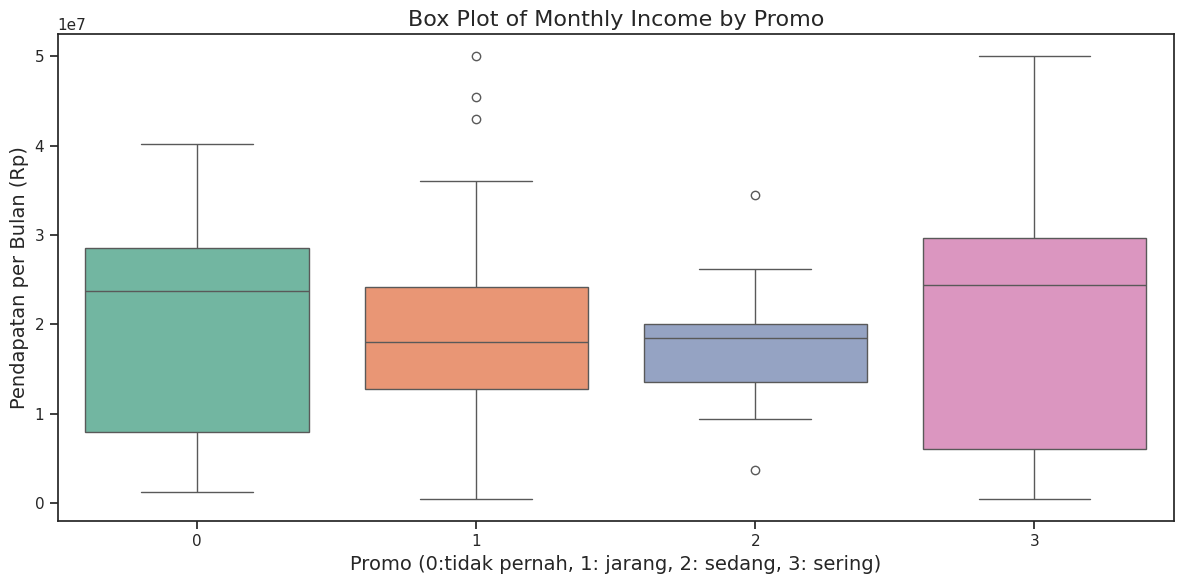

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure for the box plot
plt.figure(figsize=(12, 6))

# Box plot to show the relationship between Monthly Income and Promo
sns.boxplot(x='Promo', y='Pendapatan-per-bulan', data=df_biasa, palette='Set2')

# Customize the plot
plt.title('Box Plot of Monthly Income by Promo', fontsize=16)
plt.xlabel('Promo (0:tidak pernah, 1: jarang, 2: sedang, 3: sering)', fontsize=14)
plt.ylabel('Pendapatan per Bulan (Rp)', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Hubungan antara Pendapatan per-Bulan dengan Penggunaan Promo**

Hubungan berdasarkan pola belanjanya terbagi atas 4 kategorik yaitu

* kategori 0 = pelanggan yg pendapatan per-bulannya tinggi namun tidak pernah menggunakan promo, biasanya pelanggan seperti ini lebih mengutamakan kualitas dan ke-ekslusif-an dari barang

* kategori 1 dan 2 = pelanggan yg pendapatan per-bulannya cukup dan jarang atau hanya beberapa kali menggunakan promo

* kategori 3 = pelanggan yg pendapatannya kurang sehingga sering menggunakan promo, biasanya pelanggan seperti ini sangat sensitif dengan adanya promo

sehingga dapat kita rekomendasikan seperti berikut:

 1. Program VIP: Seperti menjadi member eksklusif

    Sistem rewards yang ditingkatkan, menawarkan keuntungan eksklusif dan pengalaman personal kepada pelanggan terpilih, biasanya mereka yang memiliki nilai transaksi tinggi atau loyalitas jangka panjang. Seperti Starbucks Gold Card: Pelanggan setia dapat gratis minuman di hari ulang tahun, akses ke menu rahasia, dan bisa memesan lewat aplikasi tanpa antre.

 2. Buat program "member-get-member" dengan insentif menarik

    Strategi akuisisi pelanggan di mana pelanggan yang sudah ada diberi insentif untuk mengajak teman, keluarga, atau kenalan mereka untuk menjadi pelanggan baru. Seperti Gojek: Kamu bisa kasih kode promo ke teman. Kalau teman pakai kodenya, kalian berdua dapat voucher diskon

 3. Tawarkan program cashback atau poin rewards untuk mendorong loyalitas

    Strategi pemasaran yang dirancang untuk mendorong loyalitas pelanggan dengan memberikan insentif finansial atau nilai tambah atas pembelian mereka. Seperti Grab: Setiap perjalanan atau pesanan makanan dapat poin. Poin bisa ditukar dengan voucher diskon atau barang gratis.

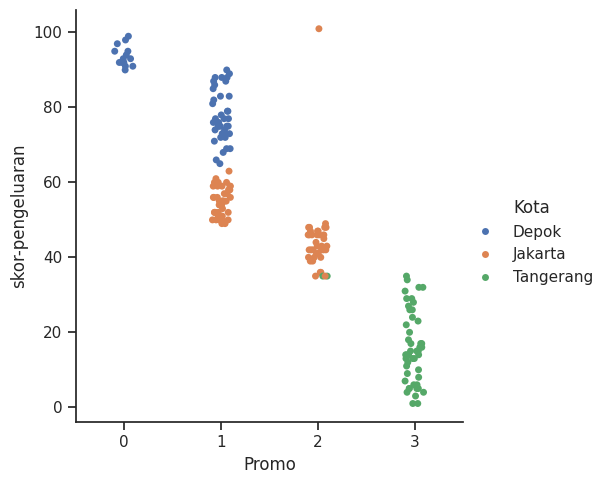

In [45]:
p = sns.catplot(y="skor-pengeluaran", x="Promo", hue="Kota", data= df_biasa)

**Hubungan antara Kota, Promo, dan Skor Pengeluaran**

Depok: Kota Depok memiliki pengeluaran tertinggi pada tingkat promo 0 dan 1. Konsumen di kota ini cenderung mengeluarkan lebih banyak meskipun jarang atau bahkan tidak pernah mendapatkan promo.

Jakarta: Di Jakarta, pengeluaran juga cukup tinggi pada promo 0 dan 1, tetapi mulai menurun saat tingkat promosi meningkat. Ini mengindikasikan bahwa warga Jakarta mungkin lebih responsif terhadap promo sedang hingga sering.

Tangerang: Tangerang menunjukkan pola yang berbeda. Meskipun sering mendapatkan promo, pengeluaran warga tetap rendah, dengan skor pengeluaran jauh di bawah kota lain.


**Rekomendasi**:
1. Depok: Pengeluaran di Depok tetap tinggi bahkan ketika promo jarang atau tidak ada. Ini menunjukkan bahwa promosi di Depok mungkin tidak perlu terlalu sering dilakukan. Kita dapat lebih fokus pada memberikan promosi yang lebih eksklusif atau berdasarkan loyalitas pelanggan, misalnya diskon khusus pada momen tertentu atau untuk pelanggan yang sering berbelanja. Selain itu, juga dapat mempertimbangkan untuk mengurangi frekuensi promosi, karena konsumen di Depok tetap mengeluarkan uang meskipun promosi jarang dilakukan.

2. Jakarta: Di Jakarta, pengeluaran juga relatif tinggi pada tingkat promo rendah, tetapi menurun seiring peningkatan promosi. Ini menunjukkan bahwa warga Jakarta mungkin jenuh dengan terlalu banyak promo. Rekomendasi untuk Jakarta adalah membatasi jumlah promosi, tetapi meningkatkan kualitas atau relevansi promo. Misalnya, dengan menerapkan promosi yang lebih personal berdasarkan preferensi belanja atau perilaku pelanggan.

3. Tangerang: Tangerang menunjukkan respons yang berbeda terhadap promo. Meskipun promosi sering dilakukan, pengeluaran tetap rendah. Ini menunjukkan bahwa warga Tangerang mungkin kurang termotivasi oleh jenis promosi yang ada. Rekomendasi untuk Tangerang adalah mengeksplorasi jenis promo yang berbeda seperti cashback, poin reward, atau hadiah langsung daripada sekadar diskon. Selain itu, mempertimbangkan untuk menargetkan konsumen dengan strategi promosi yang lebih agresif, misalnya promosi bundling atau diskon untuk pembelian dalam jumlah besar.


# Clustering

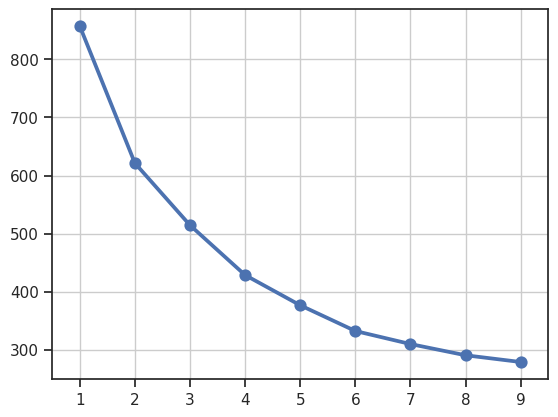

In [46]:
cost = {}
for k in range(1,10):
    kproto = KPrototypes(n_clusters = k, random_state = random_state)
    kproto.fit_predict(df_model, categorical = [3,4,5,6,7,8])
    cost[k] = kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(cost.keys()), y = list(cost.values()))
plt.grid()
plt.show()

In [47]:
C_KProto = KPrototypes(n_clusters = 4, random_state = random_state)
C_KProto = C_KProto.fit(df_model, categorical = [3,4,5,6,7,8])

#Save Model
pickle.dump(C_KProto, open('cluster.pkl', 'wb'))

In [48]:
# Menentukan segmen tiap pelanggan
C_KProto = C_KProto.predict(df_model, categorical = [3,4,5,6,7,8])
print('Segmen Pelanggan: {}\n'.format(C_KProto))

# Menggabungkan data awal dan segmen pelanggan
df_final = df_biasa.copy()
df_final['C_KProto'] = C_KProto
df_final.head(4)

Segmen Pelanggan: [3 2 3 0 3 2 0 0 0 0 2 1 3 3 3 1 2 3 0 0 3 1 2 0 3 3 0 2 0 2 2 3 0 1 0 2 3
 0 3 0 2 1 2 3 0 3 0 3 0 3 1 3 3 3 3 1 3 0 3 3 3 3 2 3 0 2 3 3 3 1 0 1 3 2
 2 0 2 3 2 1 3 3 3 0 3 2 1 1 3 1 1 3 3 3 0 3 1 1 3 3 0 0 0 0 0 0 2 0 3 3 1
 3 2 3 3 1 1 1 0 2 3 1 3 0 1 0 1 2 0 0 3 2 0 1 1 2 0 3 0 3 1 1 0 2 0 3 2 2
 3 2 0 2 3 2 3 2 2 0 2 0 1 3 0 2 1 1 0 0 2 1 2 1 0 1 3 0 3 3 1 0 2 3 0 3 2
 0 3]



,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,C_KProto
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2,3
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6,2
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3,3
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7,0


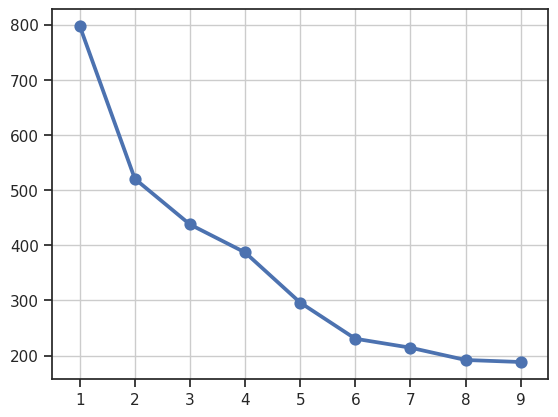

In [49]:
inertia = {}
for k in range(1,10):
    kmens = KMeans(n_clusters = k, random_state = random_state)
    kmens.fit(df_modelNum)
    inertia[k] = kmens.inertia_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(inertia.keys()), y = list(inertia.values()))
plt.grid()
plt.show()

array([1, 3, 1, 2, 1, 3, 2, 0, 2, 2], dtype=int32)

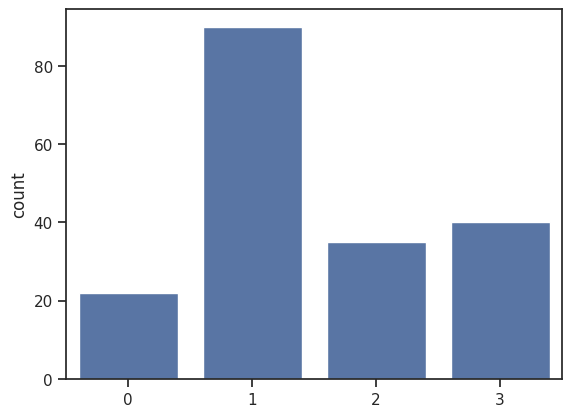

In [50]:
kmPP = cluster.KMeans(n_clusters=4, init='k-means++', random_state=random_state)
kmPP.fit(df_modelNum)
C_kmpp = kmPP.predict(df_modelNum)
sns.countplot(x=C_kmpp)
df_final['C_KMpp'] = C_kmpp
C_kmpp[:10]

In [51]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_model, C_kmpp)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.043237350222726435


In [52]:
from sklearn.cluster import AgglomerativeClustering

# Misal df adalah dataframe Anda, meskipun kategori berupa angka, Gower dapat mengenalinya sebagai kategori
distance_matrix = gower.gower_matrix(df_modelNum)

# Clustering dengan Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=4, metric='precomputed', linkage='average')
C_Hier = model.fit_predict(distance_matrix)
C_Hier

df_final['C_Hier'] = C_Hier

In [53]:
df_final.sample(6)

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,C_KProto,C_KMpp,C_Hier
179,Pria,32,23770491,73,1,Depok,1,Minggu,1,2,3,0
80,Pria,34,25819672,90,1,Depok,1,Senin,0,2,3,0
170,Wanita,27,12704918,51,1,Jakarta,1,Senin,4,0,2,2
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7,0,2,1
59,Pria,48,9836065,36,1,Jakarta,2,Sabtu,1,3,1,0
193,Pria,54,19672131,46,1,Jakarta,2,Sabtu,3,3,1,0


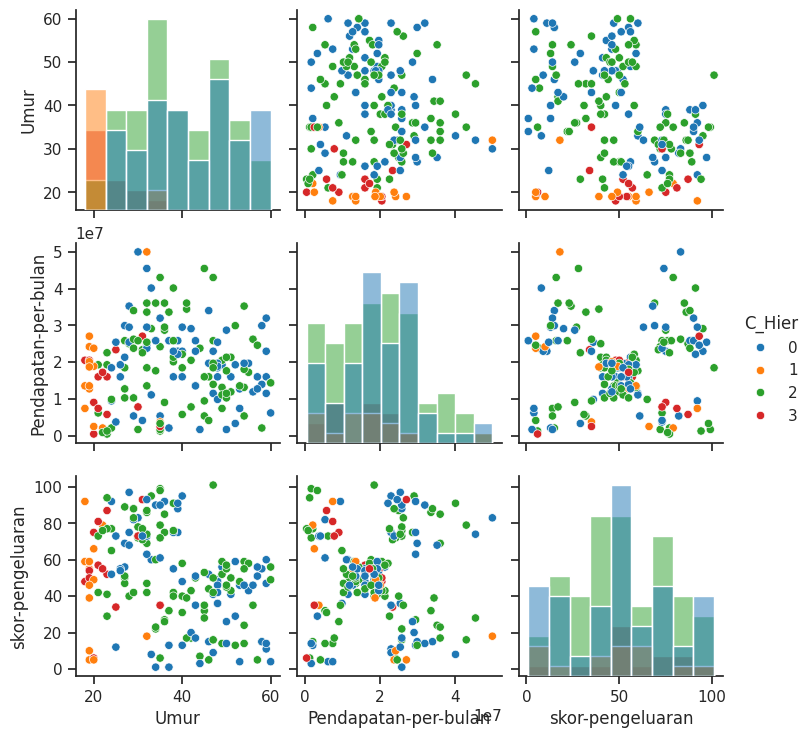

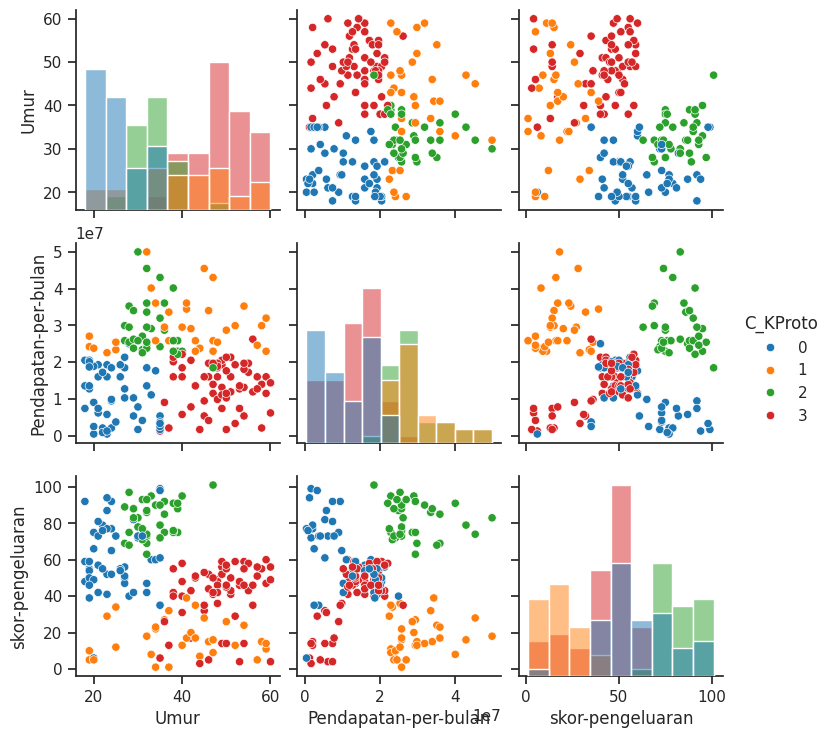

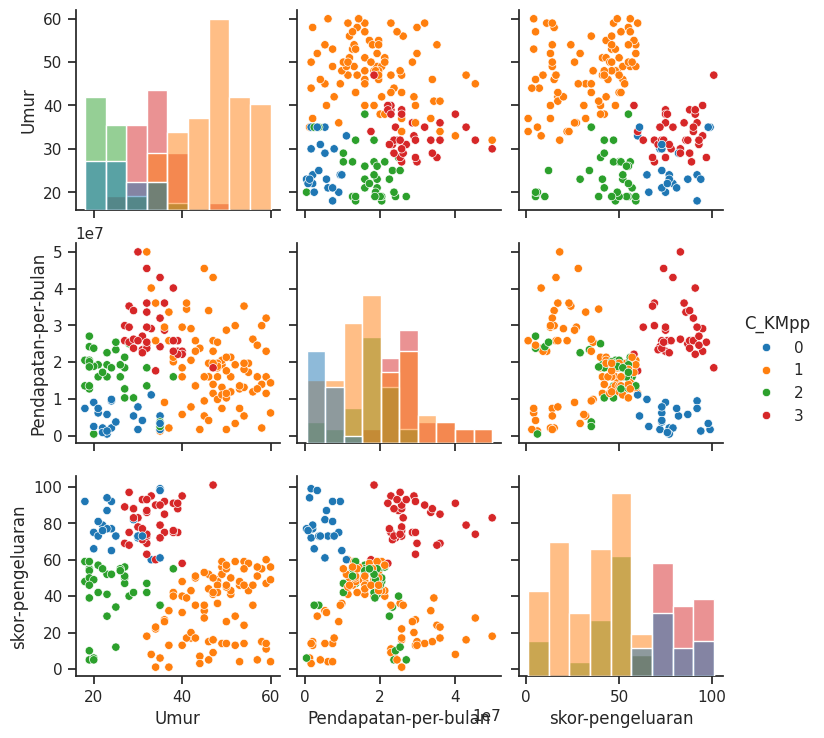

In [54]:

pairplot_Hier = sns.pairplot(df_final[['Umur', 'Pendapatan-per-bulan','skor-pengeluaran' ,'C_Hier']], hue="C_Hier", diag_kind="hist", palette="tab10")
pairplot_Proto = sns.pairplot(df_final[['Umur', 'Pendapatan-per-bulan','skor-pengeluaran' ,'C_KProto']], hue="C_KProto", diag_kind="hist", palette="tab10")
pairplot_KMpp = sns.pairplot(df_final[['Umur', 'Pendapatan-per-bulan','skor-pengeluaran' ,'C_KMpp']], hue="C_KMpp", diag_kind="hist", palette="tab10")


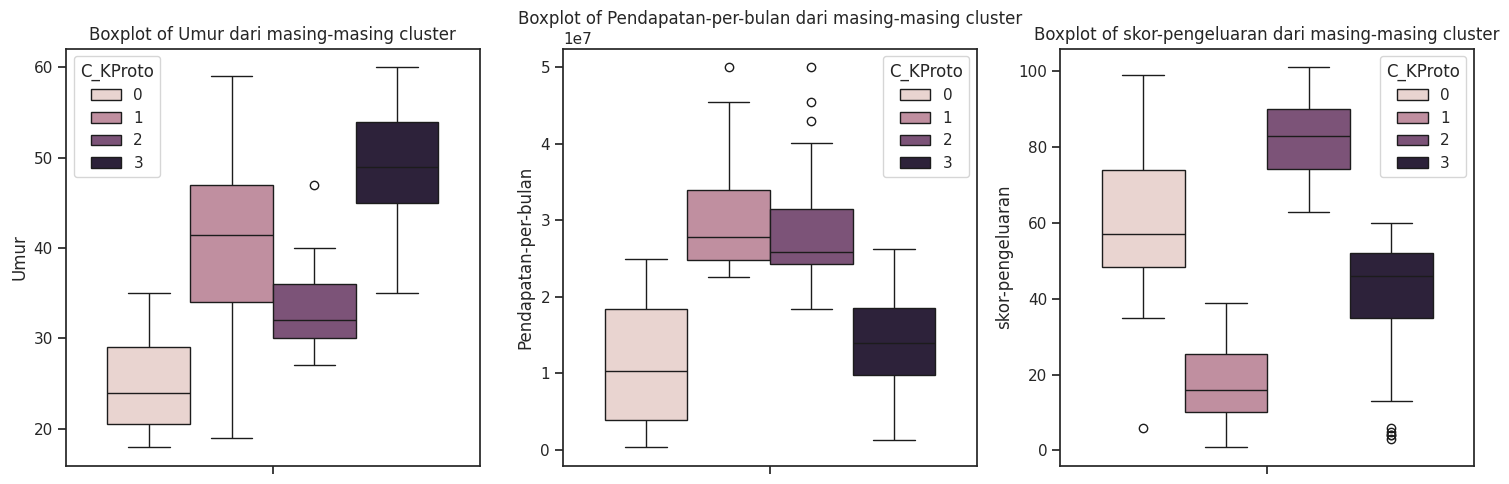

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, column in enumerate(['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']):
    sns.boxplot(data=df_final, y=column, ax=ax[i], hue='C_KProto')
    ax[i].set_title(f'Boxplot of {column} dari masing-masing cluster')

plt.tight_layout()
plt.show()

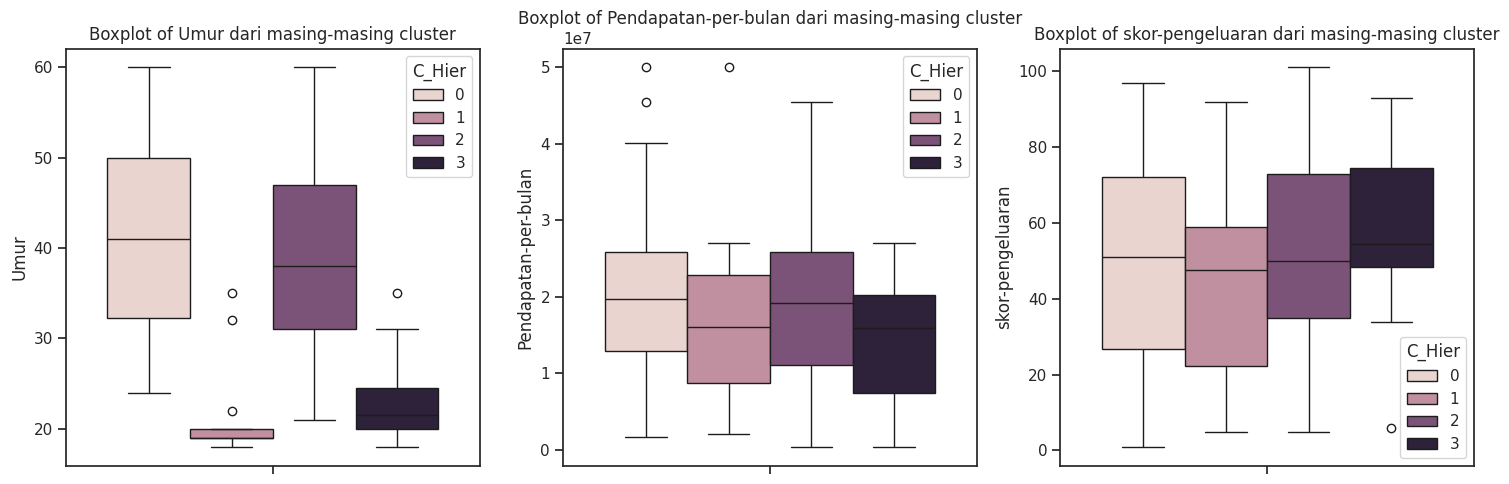

In [56]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, column in enumerate(['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']):
    sns.boxplot(data=df_final, y=column, ax=ax[i], hue='C_Hier')
    ax[i].set_title(f'Boxplot of {column} dari masing-masing cluster')

plt.tight_layout()
plt.show()

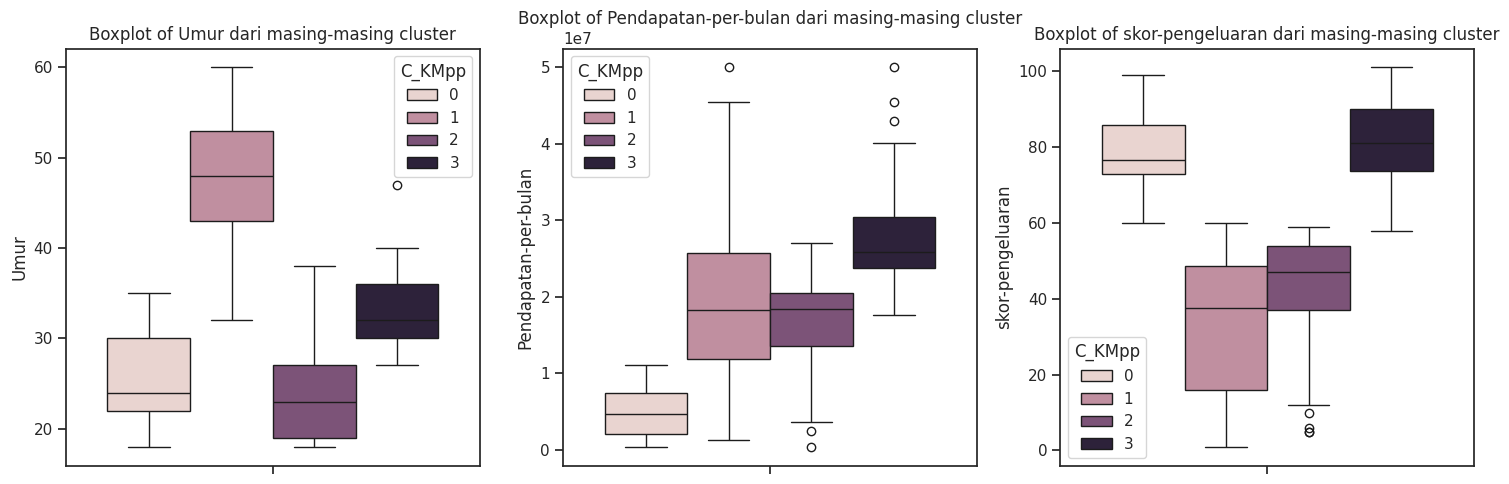

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, column in enumerate(['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']):
    sns.boxplot(data=df_final, y=column, ax=ax[i], hue='C_KMpp')
    ax[i].set_title(f'Boxplot of {column} dari masing-masing cluster')

plt.tight_layout()
plt.show()

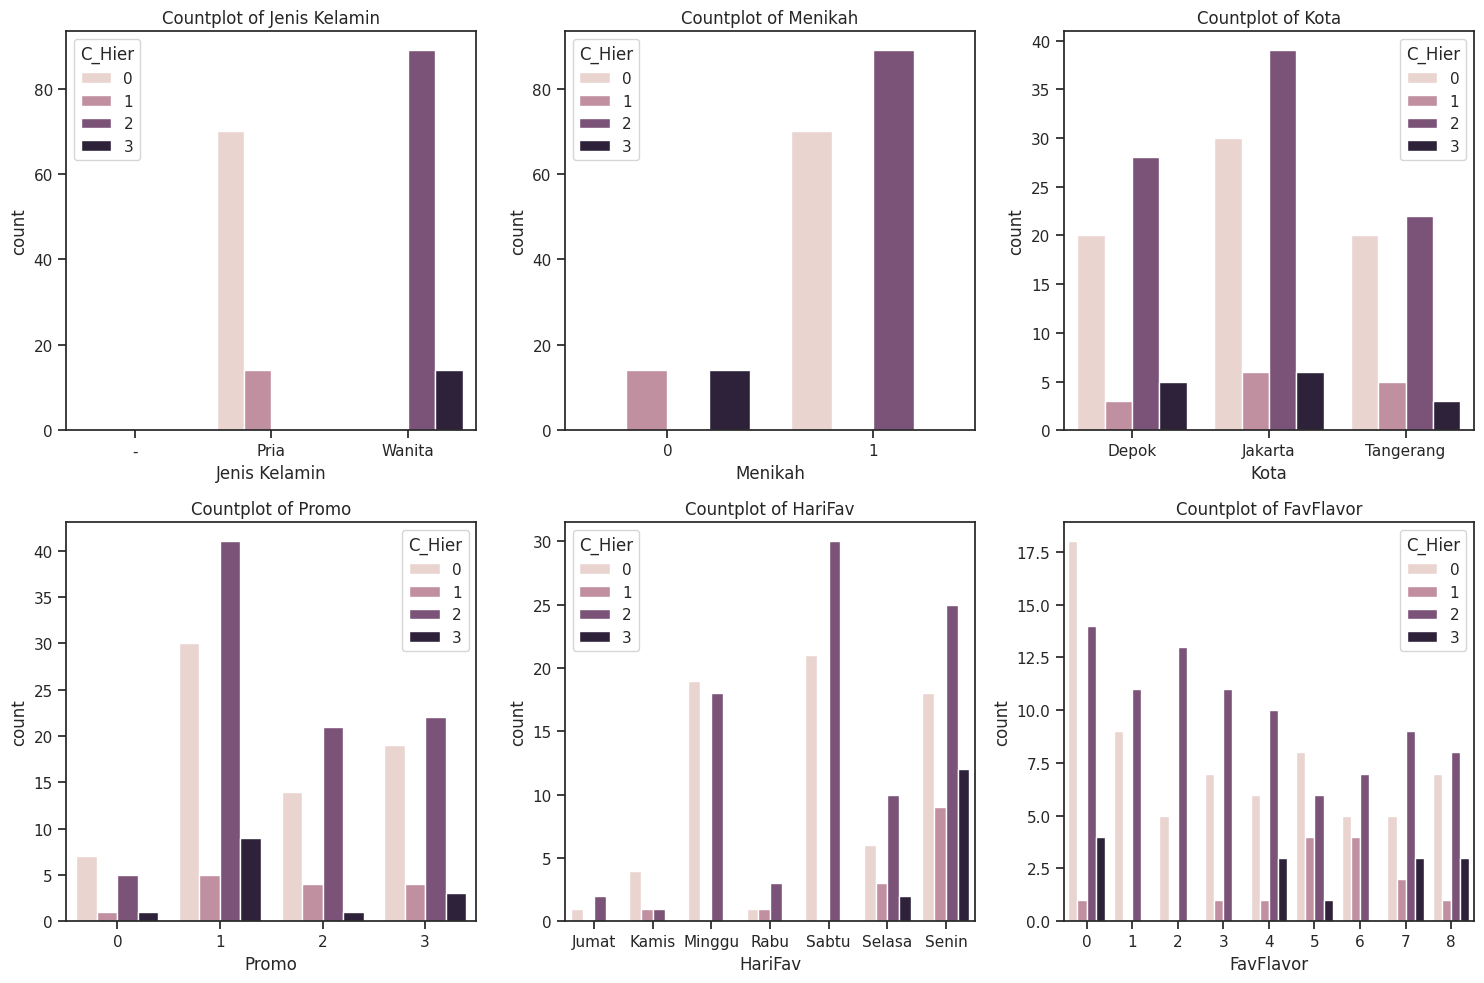

In [58]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

# Plot each categorical column in a separate subplot
for i, column in enumerate(['Jenis Kelamin', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor']):
    sns.countplot(data=df_final, x=column, ax=ax[i], hue='C_Hier')
    ax[i].set_title(f'Countplot of {column}')

plt.tight_layout()
plt.show()


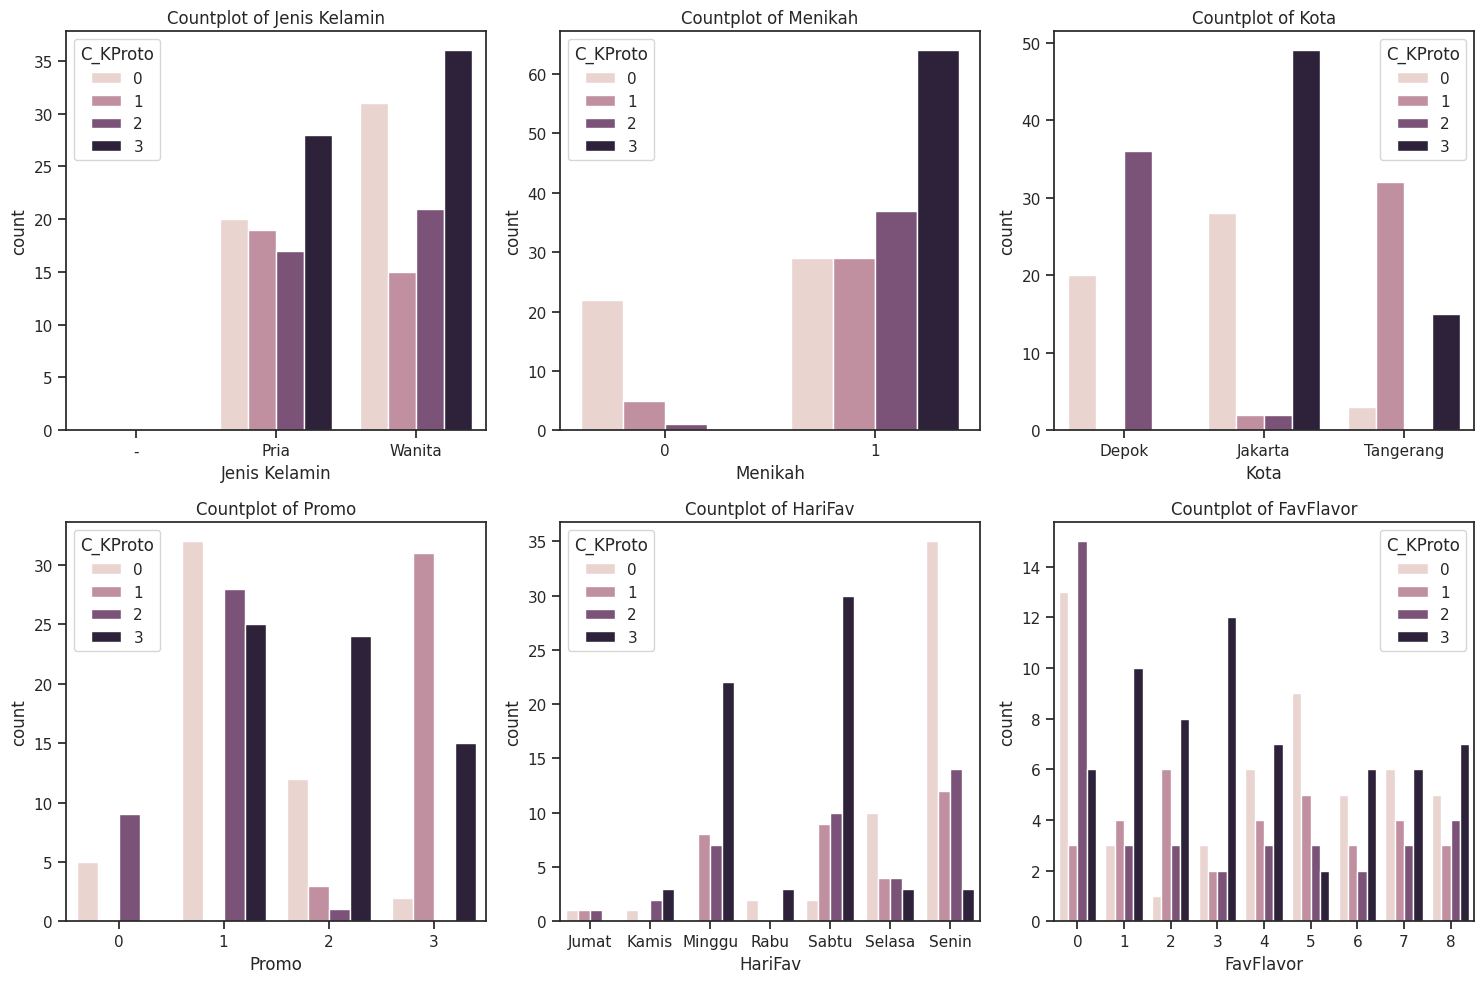

In [59]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

# Plot each categorical column in a separate subplot
for i, column in enumerate(['Jenis Kelamin', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor']):
    sns.countplot(data=df_final, x=column, ax=ax[i], hue='C_KProto')
    ax[i].set_title(f'Countplot of {column}')

plt.tight_layout()
plt.show()


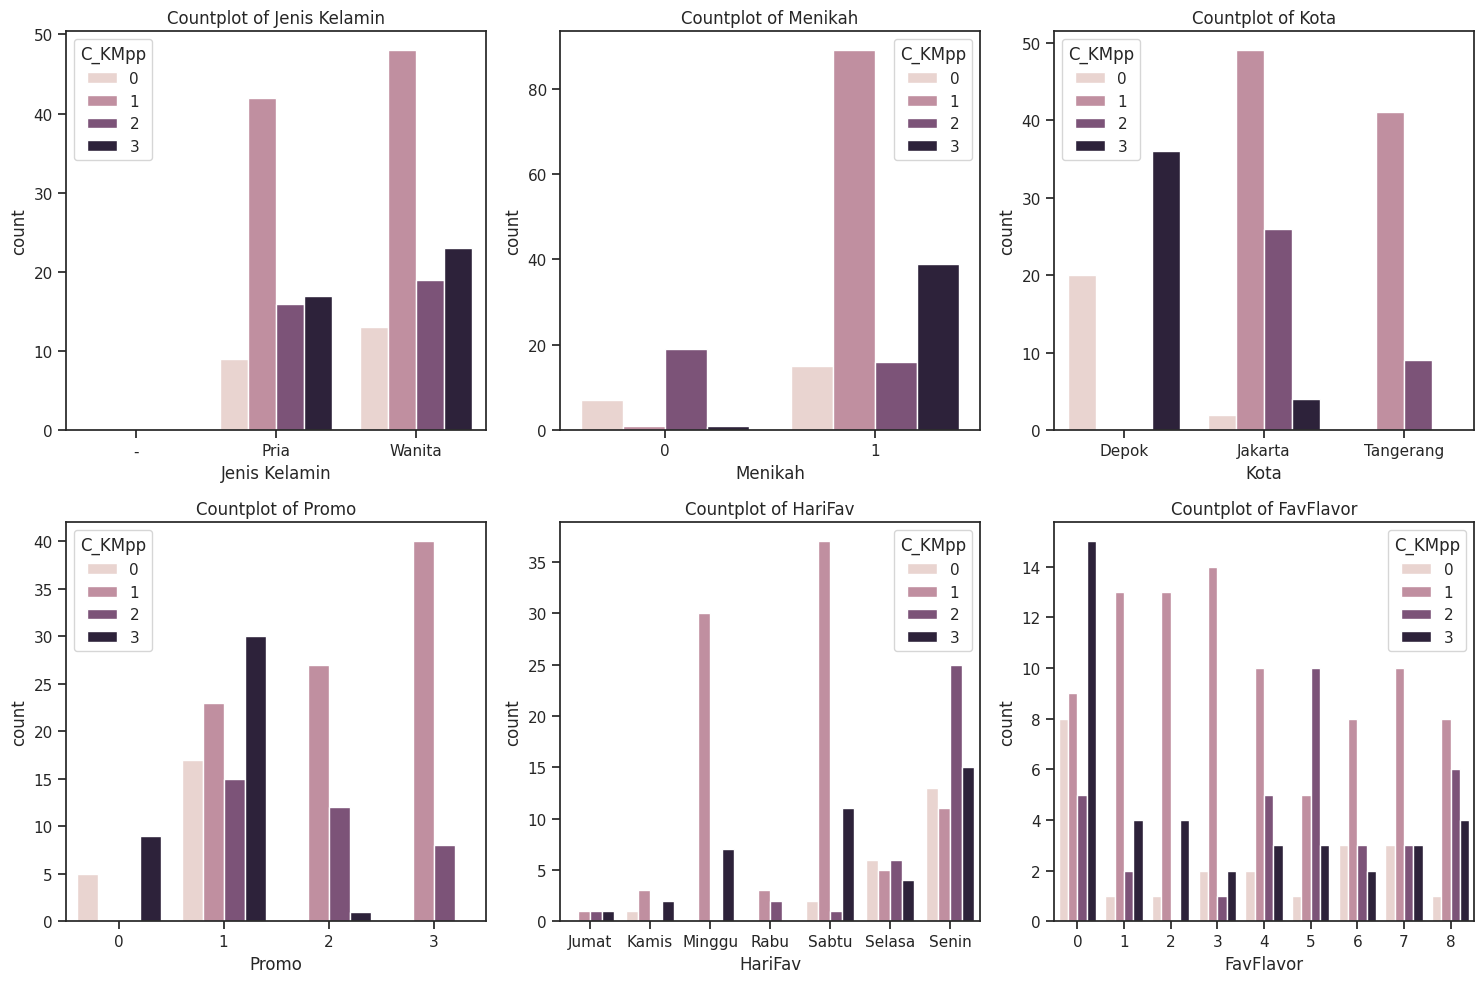

In [60]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

# Plot each categorical column in a separate subplot
for i, column in enumerate(['Jenis Kelamin', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor']):
    sns.countplot(data=df_final, x=column, ax=ax[i], hue='C_KMpp')
    ax[i].set_title(f'Countplot of {column}')

plt.tight_layout()
plt.show()


dari hasil perbandingan dapat diamati bahwa hasil klustering yang paling mudah diinterpretasikan adalah hasil kluster milik algoeritma KMeans++

Dari pengamatan melalui beberapa plot kami mendapat hasil kategori kluster:
*   Kluster 0:
    - Pelanggan yang belum menikah
    - usia berada di rentang 20-30 tahun
    - dengan skor pengeluaran antara 70-85
    - dan pendapatan per-bulan sekitar 4-8 Juta

*   Kluster 1:
    - paling sering menggunakan promo
    - usia antara 40-50 tahun
    - pendapatan perbulan 20-30 Juta
    - skor pengeluaran 20-50

*   Kluster 2:
    - usia 20-30 tahun
    - pendapatan perbulan 10-20 Juta
    - skor pengeluaran 40-50

*   Kluster 3:
    - penggunaan promo sedang
    - usia 30-40 tahun
    - pendapatan perbulan 20-30 Juta
    - skor pengeluaran 70-85



# Kesimpulan





Untuk membuka toko cabang di kota lain, strategi pemasaran yang sesuai dengan setiap kluster dapat membantu menarik pelanggan dengan lebih efektif. Berikut adalah beberapa rekomendasi berdasarkan karakteristik masing-masing kluster:

1. **Kluster 0 (Pelanggan Muda, Belum Menikah, Skor Pengeluaran Tinggi, Pendapatan Menengah):**
   - **Strategi:** Buat toko es krim dengan suasana yang trendi dan menyenangkan. Es krim dengan variasi rasa yang unik dan visual menarik akan sangat memikat kelompok ini.
   - **Promosi:** Diskon spesial untuk pelajar/mahasiswa, promo 'Beli 1 Gratis 1' pada acara tertentu, atau program loyalitas yang memberikan es krim gratis setelah pembelian beberapa kali.
   - **Penempatan Toko:** Lokasi strategis di dekat kampus, pusat perbelanjaan, atau kafe-kafe yang populer di kalangan anak muda.

2. **Kluster 1 (Pengguna Promo Aktif, Usia Lebih Tua, Pendapatan Tinggi, Skor Pengeluaran Rendah):**
   - **Strategi:** Tawarkan promo reguler dengan diskon besar, atau paket bundling es krim untuk keluarga. Kluster ini lebih tertarik pada harga yang lebih ekonomis dan penawaran menarik.
   - **Promosi:** Promo "Keluarga Hemat" untuk pembelian porsi besar atau kupon diskon yang bisa digunakan berulang kali.
   - **Penempatan Toko:** Area yang dekat dengan perumahan keluarga, mungkin di pusat perbelanjaan atau taman kota yang sering dikunjungi keluarga.

3. **Kluster 2 (Pelanggan Muda, Pendapatan Menengah-Tinggi, Skor Pengeluaran Sedang):**
   - **Strategi:** Fokus pada kualitas dan rasa yang unik dengan harga sepadan. Es krim dengan bahan-bahan premium atau opsi "custom" yang memungkinkan pelanggan menciptakan kombinasi rasa mereka sendiri akan menarik bagi mereka.
   - **Promosi:** Tawarkan paket "Es Krim Spesial" dengan rasa unik setiap bulannya. Mereka mungkin lebih menghargai pengalaman berbeda ketimbang diskon besar-besaran.
   - **Penempatan Toko:** Lokasi di pusat kota atau mal dengan akses mudah bagi pelanggan yang menikmati kenyamanan dan kualitas.

4. **Kluster 3 (Pengguna Promo Sedang, Usia Dewasa, Pendapatan Tinggi, Skor Pengeluaran Tinggi):**
   - **Strategi:** Sediakan varian es krim premium dengan bahan-bahan eksklusif seperti es krim organik atau dengan rasa dan topping mewah. Kluster ini memiliki daya beli tinggi dan menghargai kualitas.
   - **Promosi:** Program loyalitas eksklusif yang menawarkan akses ke varian rasa terbatas atau diskon pada produk premium. Berikan opsi "membership" untuk pelanggan tetap dengan keuntungan tambahan.
   - **Penempatan Toko:** Area yang lebih elit atau dekat perkantoran, di mana pelanggan ini mungkin mengunjungi toko setelah bekerja atau pada saat bersantai di akhir pekan.

Menggabungkan strategi yang tepat dengan penempatan cabang yang sesuai dapat meningkatkan daya tarik toko bagi setiap kluster pelanggan.